In [1]:
import csv
import glob
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import shutil

%matplotlib inline

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 16

In [2]:
raw_data = pd.read_csv('data/DeathRecords/DeathRecords.csv', low_memory=False)

In [3]:
print("Total rows: {0}".format(len(raw_data)))
print(list(raw_data))

Total rows: 2631171
['Id', 'ResidentStatus', 'Education1989Revision', 'Education2003Revision', 'EducationReportingFlag', 'MonthOfDeath', 'Sex', 'AgeType', 'Age', 'AgeSubstitutionFlag', 'AgeRecode52', 'AgeRecode27', 'AgeRecode12', 'InfantAgeRecode22', 'PlaceOfDeathAndDecedentsStatus', 'MaritalStatus', 'DayOfWeekOfDeath', 'CurrentDataYear', 'InjuryAtWork', 'MannerOfDeath', 'MethodOfDisposition', 'Autopsy', 'ActivityCode', 'PlaceOfInjury', 'Icd10Code', 'CauseRecode358', 'CauseRecode113', 'InfantCauseRecode130', 'CauseRecode39', 'NumberOfEntityAxisConditions', 'NumberOfRecordAxisConditions', 'Race', 'BridgedRaceFlag', 'RaceImputationFlag', 'RaceRecode3', 'RaceRecode5', 'HispanicOrigin', 'HispanicOriginRaceRecode']


In [53]:
data = raw_data.filter(['Age', 'CauseRecode39'])
data = data[data.Age < 130]

In [16]:
data.plot.area()

Error in callback <function post_execute at 0x108483b90> (for post_execute):


OverflowError: In draw_markers: Exceeded cell block limit

OverflowError: In draw_markers: Exceeded cell block limit

In [59]:
small_data = data._slice(slice(0,1000)).sort_values(by='Age')

In [57]:
stacked_data = np.zeros([np.max(data.Age), np.max(data.CauseRecode39)])

In [60]:
for idx, row in data.iterrows():    
    stacked_data[row.Age-1][row.CauseRecode39-1] += 1

ValueError: Argument dimensions are incompatible

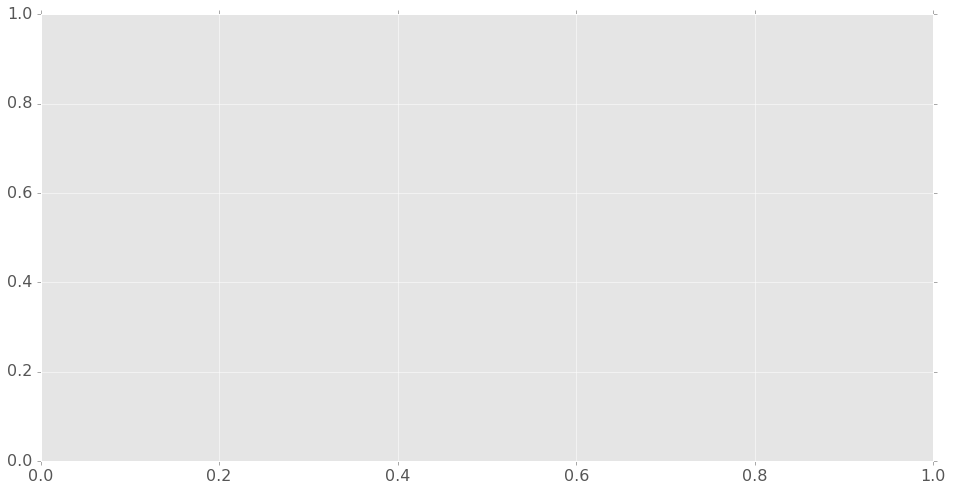

In [81]:
plt.stackplot(range(len(stacked_data)), stacked_data[0], stacked_data[1])